# Section 2.1
Tasks:
1. Load data into Pandas DataFrame object using public URLs to
read the file.
2. Examining data for consistency: Check for null values, missing data, and any data inconsistency and handle them before proceeding forward.
3. Examining attributes and target variable(s): Understand each of the attributes and the target variable. Examine the various attributes and convert any categorical ones to numerical ones, if needed. Obtain and output summary of the attributes. Check if attributes are normally distributed? If not, what could be the reason?
4. Standardize and normalize the attributes.
5. Find how the attributes are correlated to each other and the target variable. Perform numerical and visual analysis and output plots and results.
6. Identify a few important attributes and proceed forward. Do not use all attributes blindly.
7. Split the data into training and testing parts.


In [176]:
# Task: use linear regression to predict the age of abalone
# Dataset from UCI ML repository https://archive.ics.uci.edu/dataset/1/abalone

import numpy as np
import pandas as pd
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load
df = pd.read_csv('https://raw.githubusercontent.com/BenTennyson4/abalone-dataset/main/abalone-data.csv')
df.head()

# Add column names
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [177]:
# Check for null values
df.isna().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Whole weight,0
Shucked weight,0
Viscera weight,0
Shell weight,0
Rings,0


In [178]:
df.isnull().sum()

,0
Sex,0
Length,0
Diameter,0
Height,0
Whole weight,0
Shucked weight,0
Viscera weight,0
Shell weight,0
Rings,0


In [179]:
# Percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

Sex               0.0
Length            0.0
Diameter          0.0
Height            0.0
Whole weight      0.0
Shucked weight    0.0
Viscera weight    0.0
Shell weight      0.0
Rings             0.0
dtype: float64


In [180]:
# Obtain and output summary of the attributes
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [181]:
# Obtain and output summary of the attributes
# Shows the data-type of each attribute, the numbeer of non-null values, and the memory usage of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole weight    4176 non-null   float64
 5   Shucked weight  4176 non-null   float64
 6   Viscera weight  4176 non-null   float64
 7   Shell weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [182]:
# Obtain and output summary of the attributes
# Understand the distribution of unique values in each column
df.value_counts()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  Shell weight  Rings
F    0.275   0.195     0.070   0.0800        0.0310          0.0215          0.0250        5        1
M    0.400   0.315     0.105   0.2870        0.1135          0.0370          0.1130        10       1
     0.405   0.305     0.085   0.2605        0.1145          0.0595          0.0850        8        1
                       0.120   0.3185        0.1235          0.0905          0.0950        7        1
             0.310     0.100   0.3850        0.1730          0.0915          0.1100        7        1
                                                                                                   ..
I    0.250   0.185     0.065   0.0685        0.0295          0.0140          0.0225        5        1
                               0.0710        0.0270          0.0185          0.0225        5        1
             0.190     0.060   0.0765        0.0360          0.0115          0.0245        6        1
                       0.065   0.0835        0.0390          0.0150          0.0250        5        1
M    0.780   0.600     0.210   2.5480        1.1945          0.5745          0.6745        11       1
Name: count, Length: 4176, dtype: int64

In [183]:
# Use pd.get_dummies to one-hot encode the 'Sex' column
df = pd.get_dummies(df, columns=['Sex'])
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,False,True
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,True,False,False
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,False,True
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,False,True,False
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,False,True,False


In [184]:
# Drop the target variable
X = df.drop('Rings', axis=1)
y = df['Rings']
y.head()

,Rings
0,7
1,9
2,10
3,7
4,8


In [185]:
X.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,False,False,True
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,True,False,False
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,False,False,True
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,False,True,False
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,False,True,False


In [186]:
# Standardize and normalize the attributes
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)
df_scaled

array([[-1.44900723, -1.43989229, -1.18425209, ..., -0.67495143,
        -0.68813926,  1.31710822],
       [ 0.0498915 ,  0.12201495, -0.10824748, ...,  1.4815881 ,
        -0.68813926, -0.75923905],
       [-0.69955786, -0.4322102 , -0.34735962, ..., -0.67495143,
        -0.68813926,  1.31710822],
       ...,
       [ 0.63279657,  0.67624011,  1.56553747, ..., -0.67495143,
        -0.68813926,  1.31710822],
       [ 0.84097695,  0.77700832,  0.25042072, ...,  1.4815881 ,
        -0.68813926, -0.75923905],
       [ 1.54879024,  1.48238578,  1.32642533, ..., -0.67495143,
        -0.68813926,  1.31710822]])

In [187]:
# Create a dataframe from the standardized attributes
df_scaled = pd.DataFrame(df_scaled, columns=X.columns)
df_scaled.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,-1.449007,-1.439892,-1.184252,-1.230344,-1.170967,-1.205327,-1.213054,-0.674951,-0.688139,1.317108
1,0.049892,0.122015,-0.108247,-0.309601,-0.463610,-0.356844,-0.207277,1.481588,-0.688139,-0.759239
2,-0.699558,-0.432210,-0.347360,-0.637928,-0.648334,-0.607739,-0.602404,-0.674951,-0.688139,1.317108
3,-1.615552,-1.540661,-1.423364,-1.272150,-1.216022,-1.287438,-1.320816,-0.674951,1.453194,-0.759239
4,-0.824466,-1.087204,-1.064696,-0.973393,-0.983991,-0.940746,-0.853848,-0.674951,1.453194,-0.759239


In [188]:
# Add the rings column to the standardized dataframe
df_scaled['Rings'] = y
df_scaled.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M,Rings
0,-1.449007,-1.439892,-1.184252,-1.230344,-1.170967,-1.205327,-1.213054,-0.674951,-0.688139,1.317108,7
1,0.049892,0.122015,-0.108247,-0.309601,-0.463610,-0.356844,-0.207277,1.481588,-0.688139,-0.759239,9
2,-0.699558,-0.432210,-0.347360,-0.637928,-0.648334,-0.607739,-0.602404,-0.674951,-0.688139,1.317108,10
3,-1.615552,-1.540661,-1.423364,-1.272150,-1.216022,-1.287438,-1.320816,-0.674951,1.453194,-0.759239,7
4,-0.824466,-1.087204,-1.064696,-0.973393,-0.983991,-0.940746,-0.853848,-0.674951,1.453194,-0.759239,8


In [189]:
# Create a correlation matrix to find the attributes that are correlated to each other and the target variable and to find the best features to use.
corr_matrix = df_scaled.corr()
corr_matrix

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M,Rings
Length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.309602,-0.551613,0.236783,0.557123
Diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.318581,-0.564431,0.240567,0.575005
Height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.298306,-0.518828,0.215869,0.558109
Whole weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.299668,-0.557757,0.252305,0.540818
Shucked weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.263919,-0.521995,0.252048,0.421256
Viscera weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.308363,-0.556267,0.242489,0.504274
Shell weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.306248,-0.547116,0.235652,0.628031
Sex_F,0.309602,0.318581,0.298306,0.299668,0.263919,0.308363,0.306248,1.000000,-0.464461,-0.512449,0.250620
Sex_I,-0.551613,-0.564431,-0.518828,-0.557757,-0.521995,-0.556267,-0.547116,-0.464461,1.000000,-0.522462,-0.435958
Sex_M,0.236783,0.240567,0.215869,0.252305,0.252048,0.242489,0.235652,-0.512449,-0.522462,1.000000,0.181426


<Axes: >

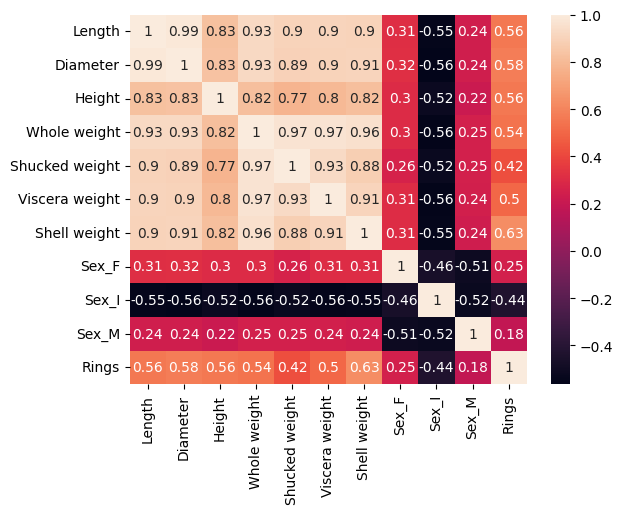

In [190]:
# annot = True to print the values inside the square
sns.heatmap(data=corr_matrix, annot=True)

Based on the correlation matrix, the variables that are most closely correlated with the number of rings (target variable Rings) are:

1. Shell weight: Correlation of 0.63

2. Diameter: Correlation of 0.58

3. Length: Correlation of 0.56

4. Height: Correlation of 0.56

5. Whole weight: Correlation of 0.54

6. Viscera weight: Correlation of 0.54

7. Shucked weight: Correlation of 0.42

8. Sex_F: 0.25

9. Sex_M: 0.18

10. Sex_I: -0.44

Observations:
The most important features based on correlation with the number of rings seem to be shell weight and diameter, followed closely by length, height, whole weight, and viscera weight.
The Sex columns (Sex_F, Sex_I, Sex_M) have weaker correlations (both positive and negative), so they are not be as important for predicting the number of rings.

In [191]:
# Select variables that make the model have the best performance
# I selected the features starting with the ones that had highest correlation and continually adding
# until I ended up with all of the features.
# The model seemed to improve in its R2 and MSE values when I added more featrues, except for the 'Sex_I' feature.
features = ['Shell weight', 'Diameter', 'Length', 'Height', 'Whole weight', 'Viscera weight', 'Shucked weight', 'Sex_F', 'Sex_I']
X = df_scaled[features]
y = df_scaled['Rings']

In [192]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [193]:
type(X_train)

pandas.core.frame.DataFrame

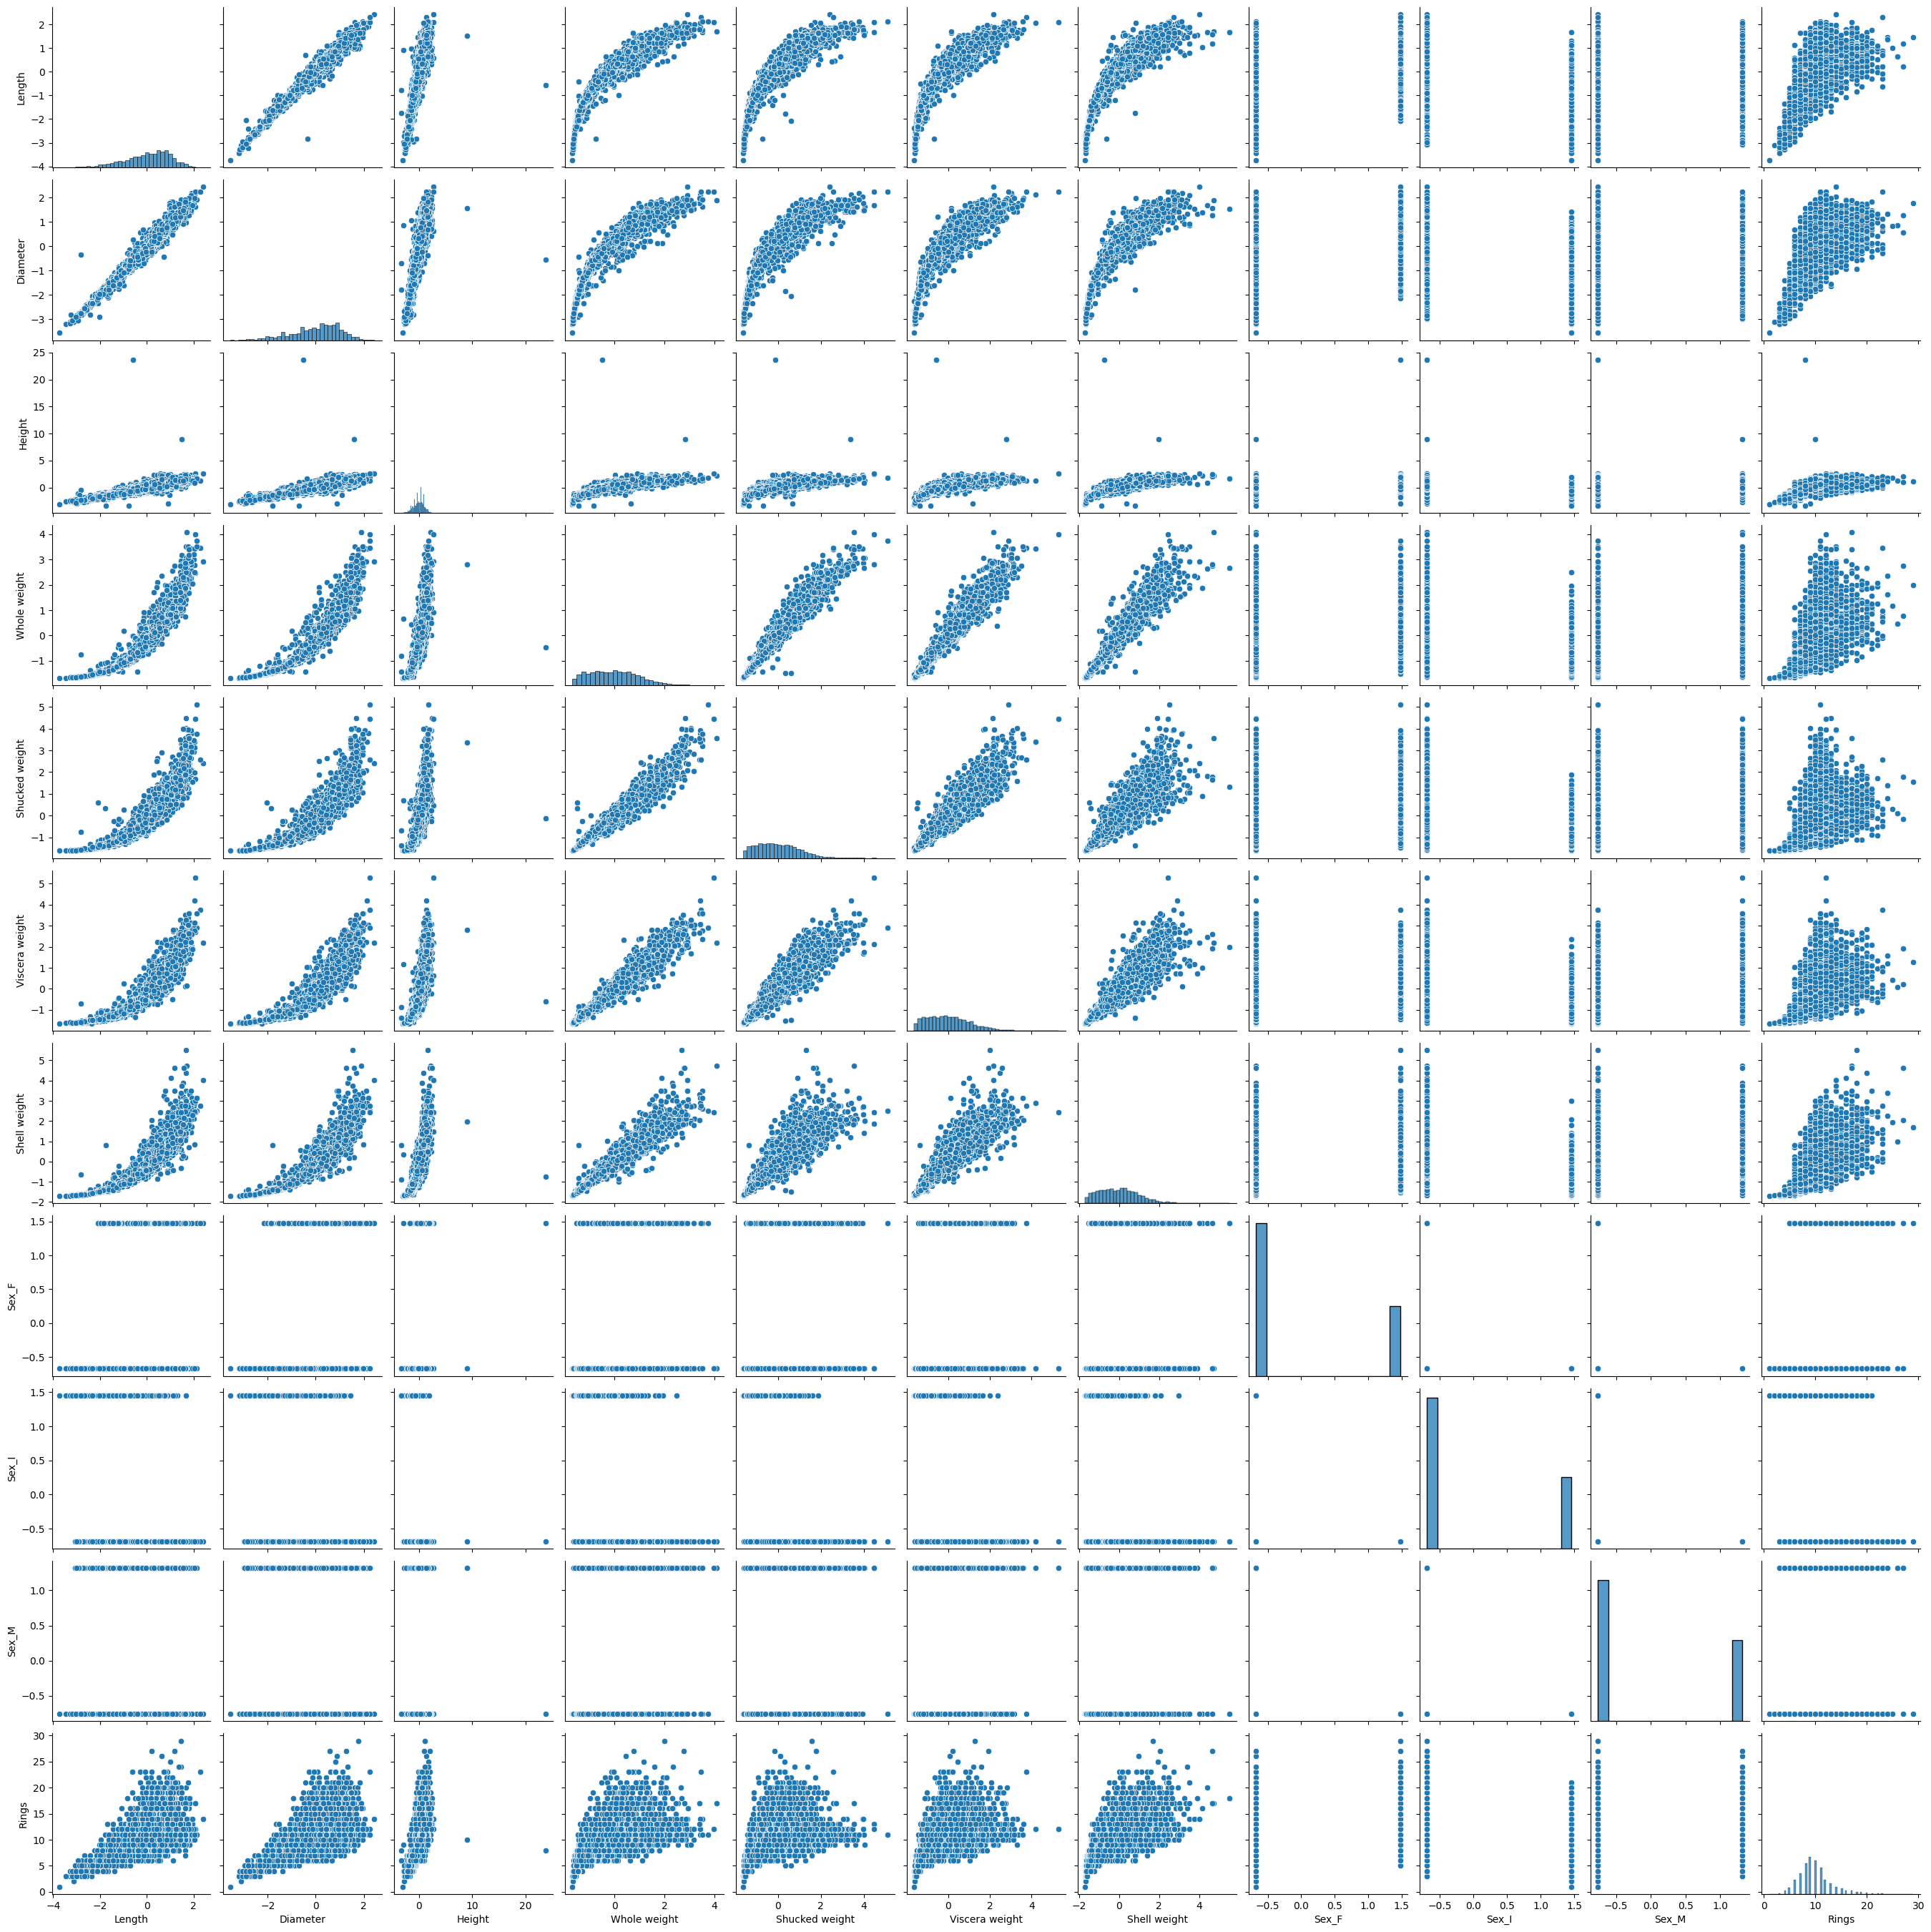

In [194]:
# Check for linearity of the data
sns.pairplot(df_scaled)

# Section 2.2
Create two types of models using SGDRegressor library of
Scikit-Learn and OLS library of statsmodels.

For the SGDRegressor library, tune the various hyper-parameters such as learning rate, maximum iterations, loss, penalty, etc. Make sure to keep track of the hyper-parameters used and results obtained. Do not just use all default values. You would need to figure out which combination of hyper-parameters works best for your dataset. Be sure to output as many result metrics as possible such as training and test error and accuracy, R-squared statistic, etc. It is highly recommended that you standardize the data
before model creation using SGDRegressor. You can use the StandardScaler method available in scikit-learn.

For the OLS library of statsmodels, output the model summary and interpret and explain all of the output diagnostics, such as coef, standard error, t-value,
p-value, R-squared, R-squared adjusted, F-statistic, etc.

For the logging of the trials, I wrote the information from each trial to a file in my google drive. Since we are not supposed to hardcode any paths to locations on our computer, I commented out the logging code. The information about each of the trials that I did is contained in the log file.

In [195]:
# Ensure that the data is standarized before fitting SGDRegessor.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [196]:
# Linear regression model using the SGDRegressor library
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Initialize the SGDRegressor model
sgd = SGDRegressor(random_state=42)

# Fit the model on the training data
sgd.fit(X_train, y_train)

# Define custom scorers
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)  # MSE should be minimized
r2_scorer = make_scorer(r2_score)  # R² is maximized by default

# Define the scoring dictionary
scoring = {'r2': r2_scorer, 'mse': mse_scorer}

# Set up hyperparameter tuning using GridSearchCV
param_grid = {
    'loss': ['squared_error', 'huber'],  # Different loss functions
    'penalty': ['l2', 'l1', 'elasticnet'],  # Regularization terms
    'alpha': [0.0001, 0.001, 0.01],  # Regularization strength
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],  # Learning rate schedules
    'eta0': [0.001, 0.01, 0.1, 0.5, 0.75],  # Initial learning rate
    'max_iter': [1000, 2000, 3000]  # Maximum iterations
}

# Use GridSearchCV to search for the best combination of hyperparameters
grid_search = GridSearchCV(sgd, param_grid, cv=5, scoring=scoring, refit='r2', verbose=2, n_jobs=-1, return_train_score=True)
grid_search.fit(X_train, y_train)

# Log all hyperparameter combinations and results from the grid search
results = pd.DataFrame(grid_search.cv_results_)

# Check if the results dataframe contains data
print(results.shape)
print(results.head())

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
(1080, 41)
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.013096      0.003872         0.002430        0.000095      0.0001   
1       0.018311      0.006195         0.002315        0.000093      0.0001   
2       0.018588      0.006118         0.002574        0.000185      0.0001   
3       0.012735      0.004140         0.002621        0.000712      0.0001   
4       0.017262      0.006159         0.002372        0.000078      0.0001   

  param_eta0 param_learning_rate     param_loss param_max_iter param_penalty  \
0      0.001            constant  squared_error           1000            l2   
1      0.001            constant  squared_error           1000            l1   
2      0.001            constant  squared_error           1000    elasticnet   
3      0.001            constant  squared_error           2000            l2   
4      0.001            constant  squared_error  

In [197]:
print(results.columns)

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_alpha', 'param_eta0', 'param_learning_rate', 'param_loss',
       'param_max_iter', 'param_penalty', 'params', 'split0_test_r2',
       'split1_test_r2', 'split2_test_r2', 'split3_test_r2', 'split4_test_r2',
       'mean_test_r2', 'std_test_r2', 'rank_test_r2', 'split0_train_r2',
       'split1_train_r2', 'split2_train_r2', 'split3_train_r2',
       'split4_train_r2', 'mean_train_r2', 'std_train_r2', 'split0_test_mse',
       'split1_test_mse', 'split2_test_mse', 'split3_test_mse',
       'split4_test_mse', 'mean_test_mse', 'std_test_mse', 'rank_test_mse',
       'split0_train_mse', 'split1_train_mse', 'split2_train_mse',
       'split3_train_mse', 'split4_train_mse', 'mean_train_mse',
       'std_train_mse'],
      dtype='object')


In [198]:
# from google.colab import drive
# drive.mount('/content/drive')

# Select only relevant columns (parameters and performance metrics)
log_columns = ['param_loss', 'param_penalty', 'param_alpha', 'param_learning_rate', 'param_eta0', 'param_max_iter',
               'mean_train_r2', 'mean_test_r2', 'mean_train_mse', 'mean_test_mse']

# Save the results into a DataFrame for logging
results_to_save = results[log_columns].copy()

# Add a unique identifier for each trial
results_to_save['trial_identifier'] = (
    results_to_save['param_loss'].astype(str) + '_' +
    results_to_save['param_penalty'].astype(str) + '_' +
    results_to_save['param_alpha'].astype(str) + '_' +
    results_to_save['param_learning_rate'].astype(str) + '_' +
    results_to_save['param_eta0'].astype(str) + '_' +
    results_to_save['param_max_iter'].astype(str)
)

# Include the features list in the log for each trial
results_to_save['features'] = [", ".join(features)] * len(results_to_save)

# Write the results to a file
# file_path = '/content/drive/My Drive/sgdregressor-log-with-trials.txt'

# try:
    # with open(file_path, 'w', encoding='utf-8') as f:
        # Write header
        # f.write('\t'.join(results_to_save.columns) + '\n')

        # Write each row
        # for idx, row in results_to_save.iterrows():
            # f.write('\t'.join(row.astype(str)) + '\n\n')  # Add extra newline between rows

    # print("File written successfully!")
# except Exception as e:
    # print(f"Error writing file: {e}")

In [199]:
## Display the log DataFrame
print(results[log_columns].head())

      param_loss param_penalty param_alpha param_learning_rate param_eta0  \
0  squared_error            l2      0.0001            constant      0.001   
1  squared_error            l1      0.0001            constant      0.001   
2  squared_error    elasticnet      0.0001            constant      0.001   
3  squared_error            l2      0.0001            constant      0.001   
4  squared_error            l1      0.0001            constant      0.001   

  param_max_iter  mean_train_r2  mean_test_r2  mean_train_mse  mean_test_mse  
0           1000       0.521373      0.503677       -4.889418      -5.058252  
1           1000       0.521388      0.503719       -4.889261      -5.057817  
2           1000       0.521376      0.503683       -4.889388      -5.058188  
3           2000       0.521373      0.503677       -4.889418      -5.058252  
4           2000       0.521388      0.503719       -4.889261      -5.057817  


In [200]:
# Best hyperparameters found
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'alpha': 0.001, 'eta0': 0.5, 'learning_rate': 'adaptive', 'loss': 'squared_error', 'max_iter': 1000, 'penalty': 'l1'}


In [201]:
# Evaluate the model using the best hyperparameters
best_model = grid_search.best_estimator_

# Predictions on the training and test set
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Training and Test Error (Mean Squared Error)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# R-squared Statistic
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [202]:
# Log the results (hyperparameters and metrics) into a DataFrame
log_columns = ['Loss', 'Penalty', 'Alpha', 'Learning_Rate', 'Eta0', 'Max_Iter', 'Train_MSE', 'Test_MSE', 'Train_R2', 'Test_R2']
log_data = {
    'Loss': [best_params['loss']],
    'Penalty': [best_params['penalty']],
    'Alpha': [best_params['alpha']],
    'Learning_Rate': [best_params['learning_rate']],
    'Eta0': [best_params['eta0']],
    'Max_Iter': [best_params['max_iter']],
    'Train_MSE': [train_mse],
    'Test_MSE': [test_mse],
    'Train_R2': [train_r2],
    'Test_R2': [test_r2]
}

log_df = pd.DataFrame(log_data, columns=log_columns)



In [203]:
# Save the log to a CSV file
# log_df.to_csv('/content/drive/My Drive/sgdregressor-log-with-trials.txt', mode='a', index=False, sep='\t')  # 'a' mode appends to the file

# Display the log DataFrame
print(log_df)

            Loss Penalty  Alpha Learning_Rate  Eta0  Max_Iter  Train_MSE  \
0  squared_error      l1  0.001      adaptive   0.5      1000   4.837126   

   Test_MSE  Train_R2   Test_R2  
0  4.661457  0.526579  0.579038  


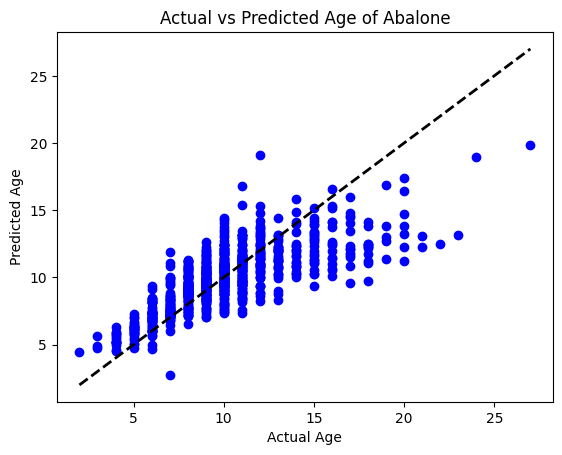

In [204]:
import matplotlib.pyplot as plt

# Assuming y_test contains actual values and y_pred contains predictions from the model
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Age of Abalone')
plt.show()

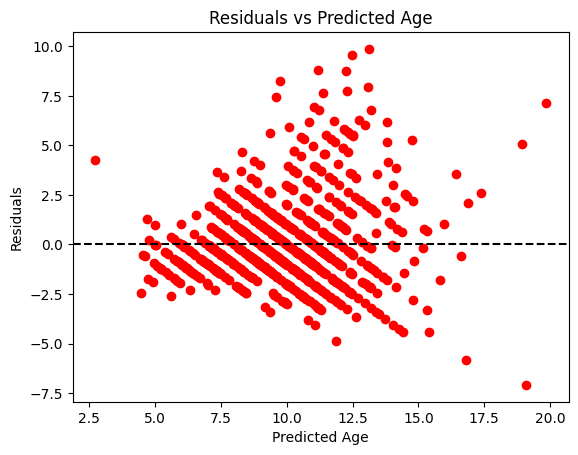

In [205]:
residuals = y_test - y_test_pred

plt.scatter(y_test_pred, residuals, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Age')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Age')
plt.show()


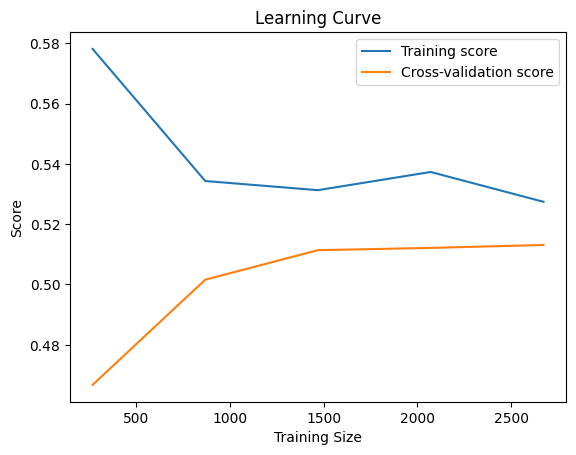

In [206]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Use the best model from GridSearchCV
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1)

# Compute the mean of training and test scores across folds
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')

plt.ylabel('Score')
plt.xlabel('Training Size')
plt.title('Learning Curve')
plt.legend()
plt.show()


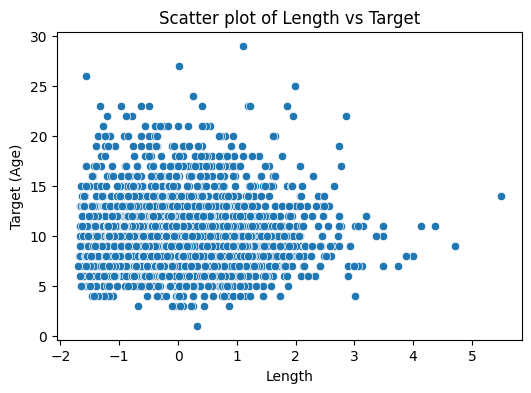

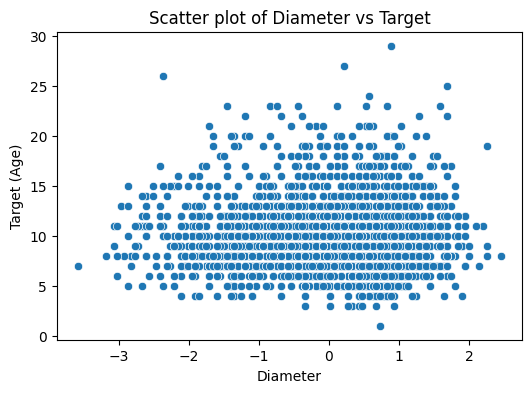

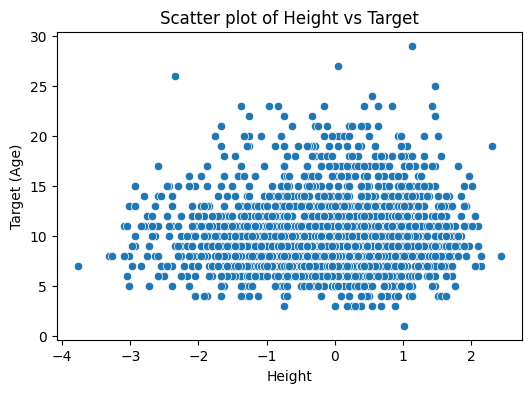

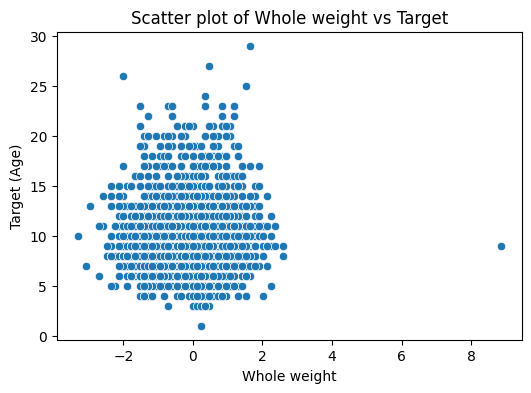

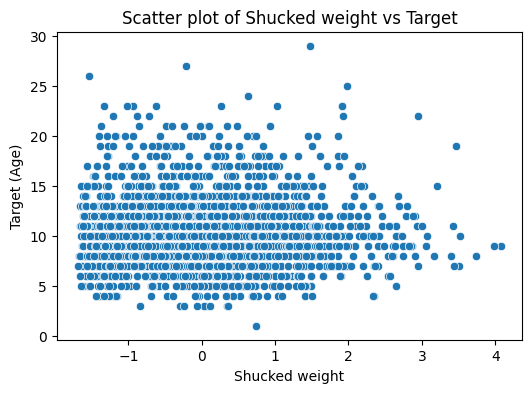

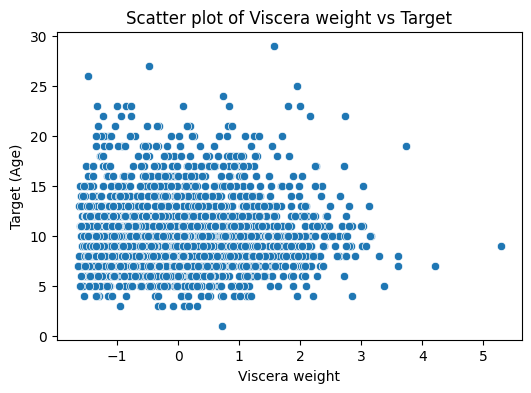

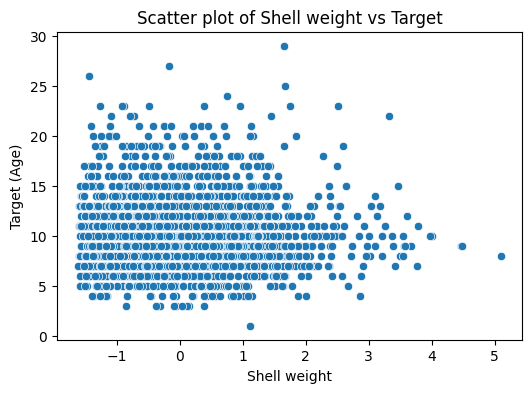

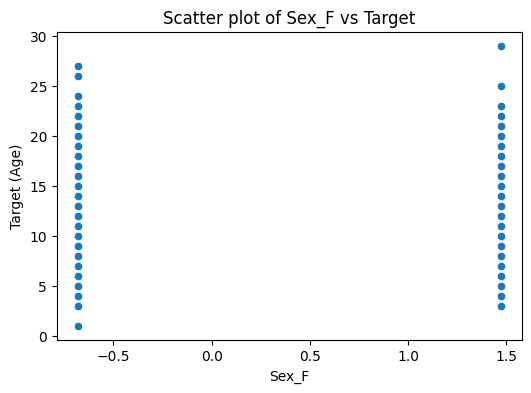

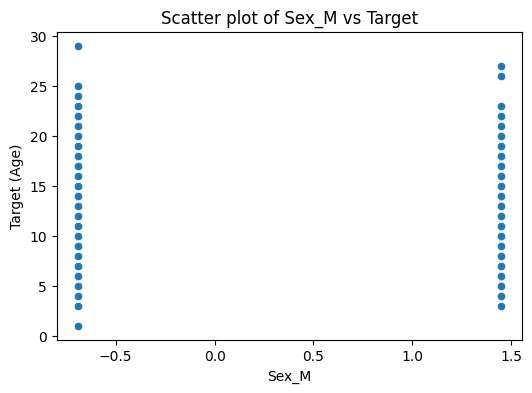

In [207]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming these are the correct feature names
feature_names = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
                 'Viscera weight', 'Shell weight', 'Sex_F', 'Sex_M']

# Convert X_train to a DataFrame with the feature names
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Plot scatter plots for each feature against the target (y_train)
for feature in X_train_df.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_train_df[feature], y=y_train)
    plt.title(f'Scatter plot of {feature} vs Target')
    plt.xlabel(feature)
    plt.ylabel('Target (Age)')
    plt.show()


# OLS from StatsModel library Linear Regression model

In [208]:
X_train_df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_M
0,-0.206445,0.374458,0.213804,-0.349939,-0.319571,-0.401949,-0.322002,-0.679490,1.447570
1,-0.632786,-0.285162,-0.414588,-0.467892,-0.791078,-0.839867,-0.816695,-0.679490,1.447570
2,-0.815503,-0.589601,-0.414588,-0.585844,-0.697185,-0.319839,-0.746670,1.471692,-0.690813
3,-1.352908,-1.908841,-1.587586,-1.647420,-1.344230,-1.314279,-1.279764,1.471692,-0.690813
4,1.083326,0.932598,0.590839,0.947543,0.458108,0.104395,0.366954,1.471692,-0.690813


In [209]:
import statsmodels.api as sm

# Convert X_train to a DataFrame for convenience
X_train_scaled_df = pd.DataFrame(X_train, columns=features)

# Add a constant (intercept) to the model
X_train_scaled_df_with_const = sm.add_constant(X_train_scaled_df)

# Reset indices to ensure they align
y_train = y_train.reset_index(drop=True)
X_train_scaled_df_with_const = X_train_scaled_df_with_const.reset_index(drop=True)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_scaled_df_with_const).fit()

# Output the summary of the model
print(ols_model.summary())

# Use the model to predict on the test set (optional)
X_test_scaled_df = pd.DataFrame(X_test, columns=features)
X_test_scaled_df_with_const = sm.add_constant(X_test_scaled_df)
y_pred = ols_model.predict(X_test_scaled_df_with_const)


                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     411.8
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        01:06:41   Log-Likelihood:                -7371.3
No. Observations:                3340   AIC:                         1.476e+04
Df Residuals:                    3330   BIC:                         1.482e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.9228      0.038    260.

In [210]:
# Check what features are used to fit the model
ols_model.params

,0
const,9.922754
Shell weight,1.123198
Diameter,1.231808
Length,-0.157507
Height,0.423346
Whole weight,4.332876
Viscera weight,-1.104984
Shucked weight,-4.296834
Sex_F,-0.040020
Sex_I,-0.398750


In [211]:
X_train_df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_M
0,-0.206445,0.374458,0.213804,-0.349939,-0.319571,-0.401949,-0.322002,-0.679490,1.447570
1,-0.632786,-0.285162,-0.414588,-0.467892,-0.791078,-0.839867,-0.816695,-0.679490,1.447570
2,-0.815503,-0.589601,-0.414588,-0.585844,-0.697185,-0.319839,-0.746670,1.471692,-0.690813
3,-1.352908,-1.908841,-1.587586,-1.647420,-1.344230,-1.314279,-1.279764,1.471692,-0.690813
4,1.083326,0.932598,0.590839,0.947543,0.458108,0.104395,0.366954,1.471692,-0.690813


In [212]:
import pandas as pd
import statsmodels.api as sm


# Convert X_train to a DataFrame
X_train_scaled_df = pd.DataFrame(X_train, columns=features)

# Drop the 'Length' column from X_train
X_train_scaled_df = X_train_scaled_df.drop('Length', axis=1)

# Add a constant (intercept) to the model
X_train_scaled_df_with_const = sm.add_constant(X_train_scaled_df)

# Reset indices to ensure they align
y_train = y_train.reset_index(drop=True)
X_train_scaled_df_with_const = X_train_scaled_df_with_const.reset_index(drop=True)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_scaled_df_with_const).fit()

# Output the summary of the model
print(ols_model.summary())

# Use the model to predict on the test set
# Convert X_test to a DataFrame (including 'Length')
X_test_scaled_df = pd.DataFrame(X_test, columns=features)

# Drop the 'Length' column from X_test as well
X_test_scaled_df = X_test_scaled_df.drop('Length', axis=1)

# Add a constant (intercept) to the test set
X_test_scaled_df_with_const = sm.add_constant(X_test_scaled_df)

# Predict using the OLS model
y_pred = ols_model.predict(X_test_scaled_df_with_const)


                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     463.3
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        01:06:48   Log-Likelihood:                -7371.5
No. Observations:                3340   AIC:                         1.476e+04
Df Residuals:                    3331   BIC:                         1.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.9228      0.038    260.

In [221]:
# Assuming columns_to_keep selects 7 columns, adjust the features list to match
features = ['Shell weight', 'Diameter', 'Height', 'Whole weight', 'Viscera weight', 'Sex_F', 'Sex_M']  # Example

# Convert X_train to a DataFrame with only the selected columns
X_train_scaled_df = pd.DataFrame(X_train[:, columns_to_keep], columns=features)

# Add a constant (intercept) to the model
X_train_scaled_df_with_const = sm.add_constant(X_train_scaled_df)

# Reset indices to ensure they align
y_train = y_train.reset_index(drop=True)
X_train_scaled_df_with_const = X_train_scaled_df_with_const.reset_index(drop=True)

# Fit the OLS model
ols_model = sm.OLS(y_train, X_train_scaled_df_with_const).fit()

# Output the summary of the model
print(ols_model.summary())

# Use the model to predict on the test set (optional)
X_test_scaled_df = pd.DataFrame(X_test[:, columns_to_keep], columns=features)
X_test_scaled_df_with_const = sm.add_constant(X_test_scaled_df)
y_pred = ols_model.predict(X_test_scaled_df_with_const)


                            OLS Regression Results                            
Dep. Variable:                  Rings   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     518.4
Date:                Mon, 09 Sep 2024   Prob (F-statistic):               0.00
Time:                        01:08:34   Log-Likelihood:                -7390.2
No. Observations:                3340   AIC:                         1.480e+04
Df Residuals:                    3332   BIC:                         1.485e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.9228      0.038    258.

The following graphs are created using the output of the OLS model above

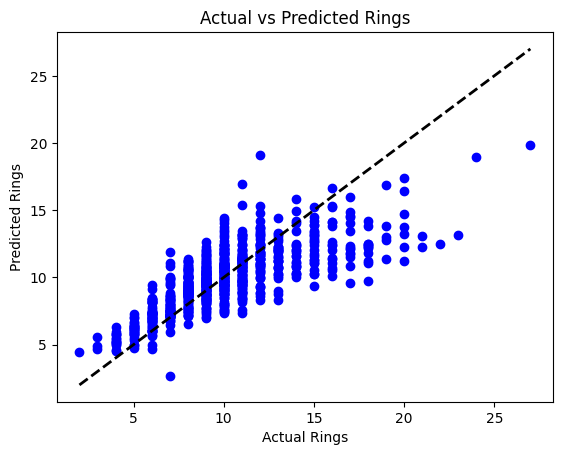

In [214]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title('Actual vs Predicted Rings')
plt.show()


In [215]:
print(len(y_test), len(y_pred))


836 836


y_pred size: 836, residuals size: 836


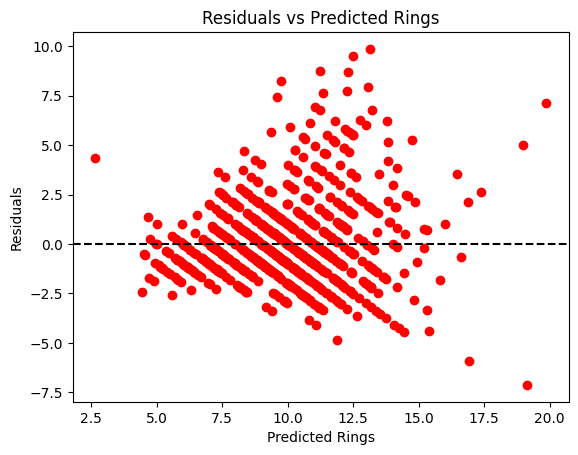

In [216]:
import numpy as np

# Convert y_test and y_pred to NumPy arrays for consistency
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Calculate residuals
residuals = y_test - y_pred

# Verify that sizes are the same
print(f'y_pred size: {len(y_pred)}, residuals size: {len(residuals)}')

# Now plot residuals vs predicted values
plt.scatter(y_pred, residuals, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Rings')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Rings')
plt.show()


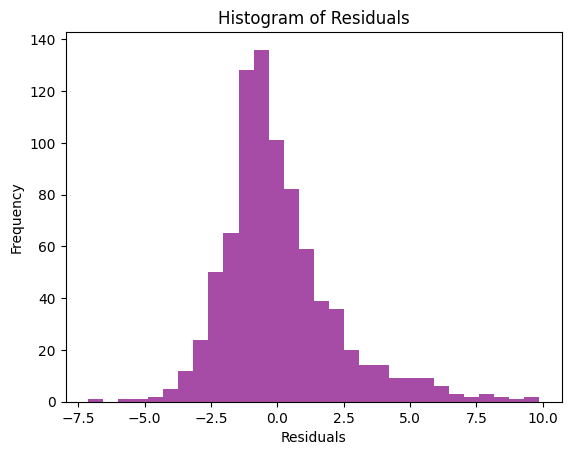

In [217]:
plt.hist(residuals, bins=30, color='purple', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()


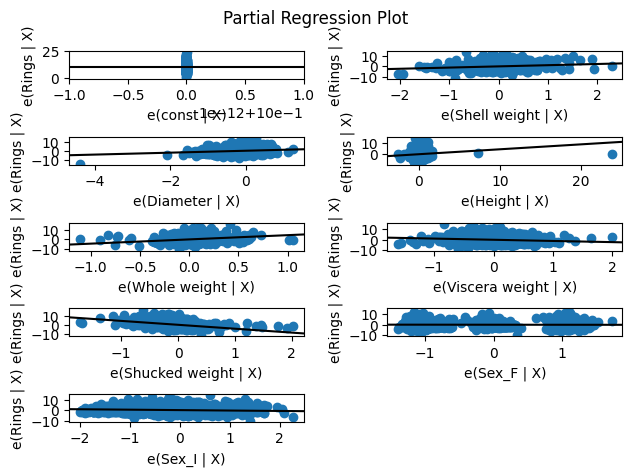

In [218]:
import statsmodels.api as sm
fig = sm.graphics.plot_partregress_grid(ols_model)
fig.tight_layout(pad=1.0)
plt.show()


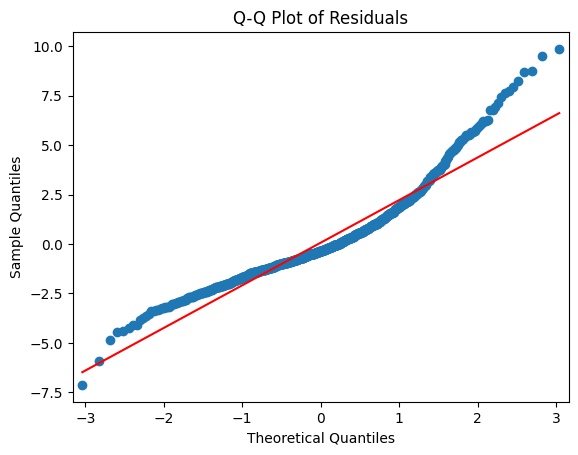

In [222]:
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()
